## Import packages

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')

## Implementation

### Read data

In [59]:
path = 'FILE PATH'
file_name = 'FILE NAME'

input_file = os.path.join(path, file_name)
df = pd.read_csv(input_file)

In [60]:
df.columns = ['stock_id', 'index_num', 'date', 'open', 'close']
# df.set_index('stock_id', inplace=True)
df.drop(columns=['index_num'], inplace=True)
df['returns'] = df['close']/df['open']-1
df.head()

,stock_id,date,open,close,returns
0,300575.XSHE,2021-11-24 14:25:00,23.40,23.39,-0.000427
1,300575.XSHE,2021-11-24 14:30:00,23.40,23.33,-0.002991
2,300575.XSHE,2021-11-24 14:35:00,23.35,23.38,0.001285
3,300575.XSHE,2021-11-24 14:40:00,23.38,23.33,-0.002139
4,300575.XSHE,2021-11-24 14:45:00,23.33,23.33,0.000000


### Prepare the dataset

In [61]:
stock_list = df['stock_id'].unique().tolist()
keep_cols = ['date', 'returns']

data = df[['date']].drop_duplicates()
for i in range(len(stock_list)):
    df1 = df[df['stock_id']==stock_list[i]][keep_cols]
    df1.columns = ['date', stock_list[i]]
    data = pd.merge(data, df1, on='date', how='left')

# Prepare the dataset for the computing process
data = data[0:5000]
data.dropna(inplace=True, axis=1)
data.set_index('date', inplace=True)

### Compute the optimal weights

In [62]:
# index_row = data.index
# index_col = data.columns

# data_T = pd.DataFrame(data.values.T, columns=index_row, index=index_col)
# Sigma = data_T.corr()
# Sigma_inv = pd.DataFrame(np.linalg.pinv(Sigma.values), columns=Sigma.columns, index=Sigma.index)

# test_inv = Sigma_inv.dot(Sigma)

# Calculate the covariance matrix of stock returns
Sigma = data.corr()
Sigma_inv = pd.DataFrame(np.linalg.pinv(Sigma.values), columns=Sigma.columns, index=Sigma.index).to_numpy()

In [63]:
# Get the optimal weight for each stock
n = len(data.columns)
Identity = pd.DataFrame(np.ones([n,1]))
Identity_T = pd.DataFrame(np.ones([1,n]))
a = (Identity_T.dot(Sigma_inv)).dot(Identity).values
weight_opt = Sigma_inv.dot(Identity) / a

print(weight_opt)

[[ 0.07061957]
 [ 0.00145262]
 [ 0.08531482]
 [ 0.02239177]
 [ 0.00322652]
 [ 0.02288778]
 [-0.00099829]
 [ 0.00831482]
 [ 0.0641998 ]
 [ 0.01590654]
 [ 0.04205874]
 [-0.00890555]
 [ 0.00702381]
 [ 0.06091912]
 [ 0.10009847]
 [ 0.02263378]
 [ 0.0128534 ]
 [ 0.04478186]
 [ 0.04785075]
 [ 0.03815233]
 [ 0.03468743]
 [ 0.03902049]
 [ 0.02748264]
 [ 0.05117066]
 [ 0.03951018]
 [ 0.09334526]
 [ 0.05400066]]


### Check results

Sum of weights:  1.0000000000000004


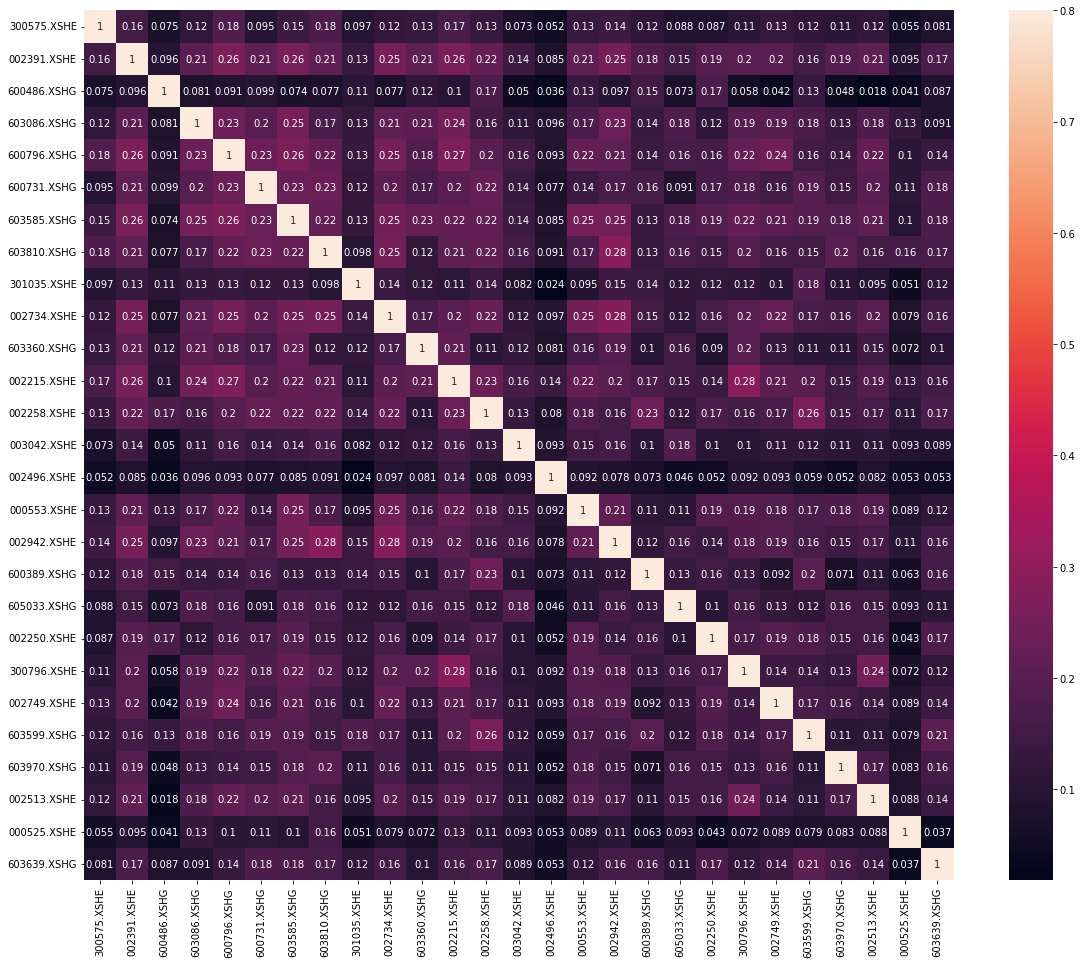

In [64]:
print('Sum of weights: ', weight_opt.sum())

hmap = plt.subplots(figsize = (20,16))
hmap = sns.heatmap(Sigma, vmax=.8, square=True, annot=True)

## Comparison

In [66]:
data_opt = data.copy()

# Equally weighted
data['sum_eqw'] = data.apply(lambda x: x.sum(), axis=1)

# Optimal weight
for col in data.columns:
    i = 0
    data_opt[col] = data_opt[col]*weight_opt[i]
    i += 1

data_opt['sum_opt'] = data_opt.apply(lambda x: x.sum(), axis=1)

<AxesSubplot:xlabel='date'>

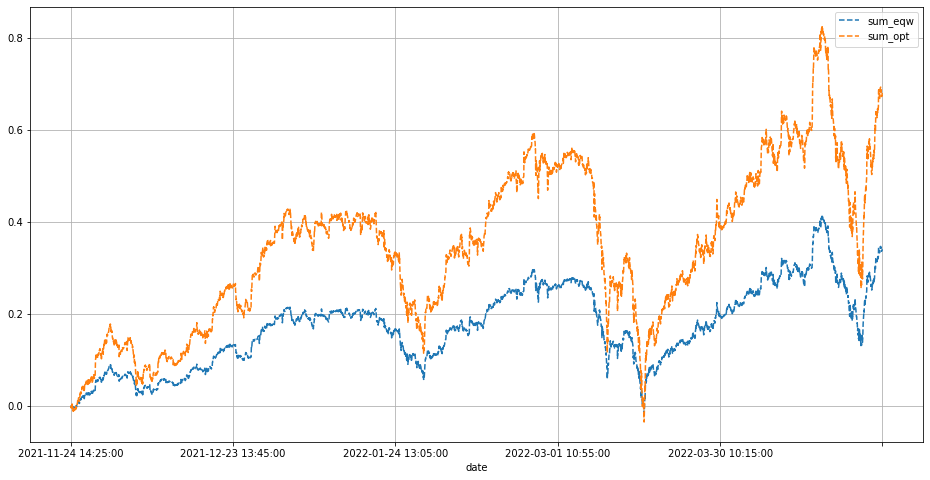

In [67]:
data_opt[['sum_eqw',
       'sum_opt']].dropna().cumsum().plot(grid=True,
                                                         figsize=(16, 8),
                                                         style=['--', '--'])